In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline


from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

from sklearn import cross_validation as cv
from scipy import linalg



from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


C:\Users\joydeep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
df=pd.read_csv("C:\\Users\\joydeep\\Desktop\\IPL CODES\\CASE STUDY\\Energy\\Energy1\\energydata_complete.csv")


In [76]:
df.head(2)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [77]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [78]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [81]:
X=data.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28]]

y=data.iloc[:,-8]



In [79]:

type(X)




pandas.core.frame.DataFrame

In [82]:
type(y)

pandas.core.series.Series

In [83]:
X.shape

(19735, 25)

In [84]:
y.shape

(19735,)

In [85]:
y[0:3]


0    6.60
1    6.48
2    6.37
Name: T_out, dtype: float64

In [166]:
# Scale data  ...X becomes Numpy array & Yis pandas core series 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

type(X)
type(X)





numpy.ndarray

In [175]:

# Building the modle on the whole data set 
# Create objects of the model and fit models  and finally eyeball the model 

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
linear=linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
elastic=linear_model.ElasticNet()
# Fit the models
linear.fit(X,y)
lasso.fit(X, y)
ridge.fit(X, y)
elastic.fit(X,y)

print(type(X))
print(type(y))

elastic
ridge



<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [215]:
# Model Evaluation : R2,Adj-R2,coef_,intercept_,RSME,MAPE,Pvalue

#1 Adj_RSQUARED and RSQUARE

def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0)
    R2 = 1- sse/sst
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2

print("Linear-AdjR2:R2 ",AdjustedRSquare(linear,X,y))
print("Lasso-AdjR2:R2 ",AdjustedRSquare(lasso,X,y))
print("Ridge-AdjR2:R2 ",AdjustedRSquare(ridge,X,y))
print("Elastic-AdjR2:R2 ",AdjustedRSquare(elastic,X,y))

print("")

# Re-check
print("LinearRsq", linear.score(X,y))
print("LassoRsq", lasso.score(X,y))
print("RidgeRsq", ridge.score(X,y))
print("ElasticRsq", elastic.score(X,y))

print("")
print("Type of Rsquared is",type(linear.score(X,y)))
print("")

#2 RSME

print("Linear_RSME ",mean_squared_error(y,linear.predict(X)))
print("Lasso_RSME ",mean_squared_error(y,lasso.predict(X)))
print("Ridge_RSME ",mean_squared_error(y,ridge.predict(X)))
print("Elasticr_RSME ",mean_squared_error(y,elastic.predict(X)))
print("")
print("Type of RSME",type(mean_squared_error(y,linear.predict(X))))
print("")

#3 Coeff_
print("type of coef_ is", type(lasso.coef_))
print("")
print("coef_ of Linear is ",np.round(linear.coef_,2))
print("")
print("coef_ of Lasso is ",np.round(lasso.coef_,2))
print("")
print("coef_ of Ridge is ",np.round(ridge.coef_,2))
print("")
print("coef_ of Elastic is ",np.round(elastic.coef_,2))
print("")
print("")

# 4 Intercept 
print("type of intercept is", type(ridge.intercept_))
print("")

print("intercept of Linear is ",linear.intercept_)
print("intercept of Lasso is ",lasso.intercept_)
print("intercept of Ridge is ",ridge.intercept_)
print("intercept_ of Elastic is ",elastic.intercept_)
print("")

#5 Pvalue 

def ReturnPValue(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    x = np.hstack((np.ones((n,1)),np.matrix(X)))
    df = float(n-k-1)
    sampleVar = sse/df
    sampleVarianceX = x.T*x
    covarianceMatrix = linalg.sqrtm(sampleVar*sampleVarianceX.I)
    se = covarianceMatrix.diagonal()[1:]
    betasTstat = np.zeros(len(se))
    for i in range(len(se)):
        betasTstat[i] = model.coef_[i]/se[i]
    betasPvalue = 1- stats.t.cdf(abs(betasTstat),df)
    return betasPvalue

#np.round(ReturnPValue(lasso,X,y),2)

# 6 MAPE & MSSE


def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    return MAPE, MSSE

#ErrorMetric(linear,X,y)
#np.mean((y-linear.predict(X))

ErrorMetric(lasso,X,y)
    


Linear-AdjR2:R2  (0.9931724932070761, 0.9931811426278637)
Lasso-AdjR2:R2  (0.8085308987529466, 0.8087734612101867)
Ridge-AdjR2:R2  (0.9931723797624328, 0.9931810293269376)
Elastic-AdjR2:R2  (0.9027617329518876, 0.9028849191622961)

LinearRsq 0.9931811426278637
LassoRsq 0.8087734612101867
RidgeRsq 0.9931810293269377
ElasticRsq 0.9028849191622961

Type of Rsquared is <class 'numpy.float64'>

Linear_RSME  0.19286882778905093
Lasso_RSME  5.4087710544081835
Ridge_RSME  0.1928720324633227
Elasticr_RSME  2.7468637015850508

Type of RSME <class 'numpy.float64'>

type of coef_ is <class 'numpy.ndarray'>

coef_ of Linear is  [ 0.22 -0.1  -0.28 -0.21 -0.01  0.09 -0.01 -0.08  0.22 -0.03  1.17  0.39
  0.08 -0.03 -0.02  0.14 -0.11  0.03 -0.01 -2.75 -0.09  0.02  3.59  0.
  0.  ]

coef_ of Lasso is  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.    3.18 -0.
  0.    0.    0.    0.    0.    0.   -0.   -0.    0.   -0.    0.   -0.
 -0.  ]

coef_ of Ridge is  [ 0.22 -0.1  -0.28 -0.21 -0.01  0.0

(inf, 5.408771054408166)

In [226]:

# Building the model with Train/Test Split 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))
print(data.shape)


# In[178]:


parameters


# In[179]:


# Fit all the models in Grid Search Cross Validation .

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
elastic=linear_model.ElasticNet()

gridlasso = GridSearchCV(lasso, parameters,scoring="r2")
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridelastic=GridSearchCV(elastic,parameters,scoring="r2")



gridlasso.fit(X_train, y_train)
gridridge.fit(X_train, y_train)
gridelastic.fit(X_train,y_train)
linear.fit(X_train, y_train)


# In[180]:


# Print the best parameters, R-squared scores, MSE, and coefficients

print("ridge best parameters:", gridridge.best_params_)
print("lasso best parameters:", gridlasso.best_params_)
print("elastic best parameters:",gridelastic.best_params_)
print("")
print("ridge score:", gridridge.score(X_test, y_test))
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test))
print("elastic score:",gridelastic.score(X_test,y_test))
print("")

print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
print("elastic MSE:", mean_squared_error(y_test,gridelastic.predict(X_test)))
print("")


print("ridge best estimator coef:", np.round(gridridge.best_estimator_.coef_,2))
print("lasso best estimator coef:", np.round(gridlasso.best_estimator_.coef_,2))
print("linear coef:", np.round(linear.coef_,2))
print("elastic coeff:",np.round(gridelastic.best_estimator_.coef_,2))



(14801, 25)
(4934, 25)
(14801,)
(4934,)
(19735, 29)
ridge best parameters: {'alpha': 0.6}
lasso best parameters: {'alpha': 0.1}
elastic best parameters: {'alpha': 0.1}

ridge score: 0.9936149357894261
lasso score: 0.9900041810345072
linear score: 0.9936152468503304
elastic score: 0.9866801997474123

ridge MSE: 0.17796579608962068
lasso MSE: 0.2786054800851813
linear MSE: 0.17795712613742332
elastic MSE: 0.3712521562086877

ridge best estimator coef: [ 0.21 -0.1  -0.28 -0.21 -0.    0.1  -0.01 -0.09  0.25 -0.03  1.21  0.41
  0.07 -0.03 -0.01  0.13 -0.12  0.03 -0.01 -2.74 -0.08  0.02  3.57  0.
  0.  ]
lasso best estimator coef: [ 0.1   0.    0.   -0.    0.    0.    0.    0.    0.    0.    1.6  -0.
  0.    0.    0.    0.    0.    0.   -0.   -2.12  0.    0.    2.91 -0.
 -0.  ]
linear coef: [ 0.21 -0.1  -0.28 -0.21 -0.    0.1  -0.01 -0.09  0.25 -0.03  1.2   0.41
  0.07 -0.03 -0.01  0.13 -0.12  0.03 -0.01 -2.75 -0.09  0.02  3.57  0.
  0.  ]
elastic coeff: [ 0.19  0.    0.07  0.    0.    0.   

In [217]:



# Building the model with Polynomial Features 

# Polynomial features
# We can try Polynomial Rergession 
from sklearn.preprocessing import PolynomialFeatures
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,0.471160,...,1.141572,-1.217324,0.958136,-2.976328,0.82208,1.207694,2.091596,0.366854,-0.807974,-0.807974
1,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,0.471160,...,1.134554,-1.200778,0.965363,-2.962813,0.82208,1.071703,1.766584,0.343017,-0.440240,-0.440240
2,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,0.458968,...,1.109032,-1.233869,0.950910,-2.949298,0.82208,0.935713,1.441572,0.319180,0.252109,0.252109
3,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,0.458968,...,1.082233,-1.233869,0.926821,-2.935783,0.82208,0.799723,1.116559,0.295343,1.408801,1.408801
4,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,0.458968,...,1.082233,-1.233869,0.926821,-2.922268,0.82208,0.663733,0.791547,0.271506,-1.028122,-1.028122


In [223]:
poly = PolynomialFeatures(2)

poly
print(type(X))

<class 'numpy.ndarray'>


In [236]:


Xpoly = poly.fit_transform(X)
print(type(X))
print(type(Xpoly))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [221]:
# Polynomial of order 2 (25+25+25c2)
print(Xpoly.shape)
print(y.shape)

(19735, 351)
(19735,)


In [233]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xpoly,y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

print(np.shape(Xp_train))
print(np.shape(Xp_test))
print(np.shape(yp_train))
print(np.shape(yp_test))
print(data.shape)
# The features increases to 351
linear.fit(Xp_train,yp_train)


(14801, 351)
(4934, 351)
(14801,)
(4934,)
(19735, 29)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [234]:
linear.fit(Xp_train,yp_train)
lasso.fit(Xp_train,yp_train)
ridge.fit(Xp_train,yp_train)
elastic.fit(Xp_train,yp_train)
# Print Rsquared, MSE, and Coefficients
print("lasso Rsquared:", lasso.score(Xp_test, yp_test))
print("ridge Rsquared:",ridge.score(Xp_test, yp_test))
print("linear Rsquared:",linear.score(Xp_test,yp_test))
print("Elastic Rsquared:",elastic.score(Xp_test,yp_test))
print("")

print("lasso MSE:", mean_squared_error(yp_test, lasso.predict(Xp_test)))
print("ridge MSE:", mean_squared_error(yp_test, ridge.predict(Xp_test)))
print("linear MSE:",mean_squared_error(yp_test,linear.predict(Xp_test)))
print("elastic MSE:",mean_squared_error(yp_test,elastic.predict(Xp_test)))
print("")



lasso Rsquared: 0.9147403216623731
ridge Rsquared: 0.9997869583474664
linear Rsquared: 0.9997874728466749
Elastic Rsquared: 0.9121431151019972

lasso MSE: 2.37637493207555
ridge MSE: 0.005937939861373187
linear MSE: 0.005923599635771666
elastic MSE: 2.448764796591093



In [235]:
# Mappin the model on grid search

gridlasso = GridSearchCV(lasso, parameters,scoring="r2")
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridelastic=GridSearchCV(elastic,parameters,scoring="r2")



gridlasso.fit(Xp_train,yp_train)
gridridge.fit(Xp_train,yp_train)
gridelastic.fit(Xp_train,yp_train)
linear.fit(Xp_train,yp_train)


# In[180]:


# Print the best parameters, R-squared scores, MSE, and coefficients

print("ridge best parameters:", gridridge.best_params_)
print("lasso best parameters:", gridlasso.best_params_)
print("elastic best parameters:",gridelastic.best_params_)
print("")
print("ridge score:", gridridge.score(Xp_test, yp_test))
print("lasso score:", gridlasso.score(Xp_test, yp_test))
print("linear score:", linear.score(Xp_test, yp_test))
print("elastic score:",gridelastic.score(Xp_test,yp_test))
print("")

print("ridge MSE:", mean_squared_error(yp_test, gridridge.predict(Xp_test)))
print("lasso MSE:", mean_squared_error(yp_test, gridlasso.predict(Xp_test)))
print("linear MSE:", mean_squared_error(yp_test, linear.predict(Xp_test)))
print("elastic MSE:", mean_squared_error(yp_test,gridelastic.predict(Xp_test)))
print("")


print("ridge best estimator coef:", np.round(gridridge.best_estimator_.coef_,2))
print("lasso best estimator coef:", np.round(gridlasso.best_estimator_.coef_,2))
print("linear coef:", np.round(linear.coef_,2))
print("elastic coeff:",np.round(gridelastic.best_estimator_.coef_,2))



ridge best parameters: {'alpha': 0.4}
lasso best parameters: {'alpha': 0.1}
elastic best parameters: {'alpha': 0.1}

ridge score: 0.9997873741974482
lasso score: 0.9975287744572969
linear score: 0.9997874728466749
elastic score: 0.9917315161276339

ridge MSE: 0.005926349206897289
lasso MSE: 0.06887849620930048
linear MSE: 0.005923599635771666
elastic MSE: 0.23046084835966657

ridge best estimator coef: [ 0.    0.01 -0.01  0.03  0.01  0.01 -0.01  0.01  0.    0.01  0.    0.08
  0.03  0.01 -0.   -0.01  0.01 -0.03 -0.01  0.   -2.79  0.01  0.    4.24
 -0.   -0.    0.01 -0.07  0.01 -0.02  0.03  0.   -0.05 -0.01  0.09 -0.01
  0.11  0.08  0.03 -0.03 -0.04  0.01 -0.04 -0.   -0.   -0.05  0.02  0.
 -0.02  0.    0.    0.01  0.11  0.05  0.02 -0.02 -0.01  0.01 -0.03 -0.01
 -0.22 -0.09  0.03 -0.02 -0.01 -0.02 -0.05 -0.02 -0.   -0.03  0.01 -0.01
  0.16  0.    0.   -0.04 -0.08 -0.02  0.01  0.07  0.05 -0.1   0.01  0.06
 -0.05  0.04  0.02  0.04  0.01  0.    0.    0.02  0.11 -0.03 -0.   -0.11
 -0.   -0.  

In [238]:
a=data.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28]]


In [239]:
a.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [243]:
featurenames = ['intercept'] + list(a.columns)

featurenames
polyfeaturenames = [];
for i,a in enumerate(featurenames):
    for y in featurenames[i:]:
        if (a == 'intercept'):
            polyfeaturenames.append(y)
        elif (a==y):
            polyfeaturenames.append((y+'_Square'))
        else:
            polyfeaturenames.append((a+'_'+y))

print(featurenames)

['intercept', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [244]:
print (polyfeaturenames)

['intercept', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'T1_Square', 'T1_RH_1', 'T1_T2', 'T1_RH_2', 'T1_T3', 'T1_RH_3', 'T1_T4', 'T1_RH_4', 'T1_T5', 'T1_RH_5', 'T1_T6', 'T1_RH_6', 'T1_T7', 'T1_RH_7', 'T1_T8', 'T1_RH_8', 'T1_T9', 'T1_RH_9', 'T1_Press_mm_hg', 'T1_RH_out', 'T1_Windspeed', 'T1_Visibility', 'T1_Tdewpoint', 'T1_rv1', 'T1_rv2', 'RH_1_Square', 'RH_1_T2', 'RH_1_RH_2', 'RH_1_T3', 'RH_1_RH_3', 'RH_1_T4', 'RH_1_RH_4', 'RH_1_T5', 'RH_1_RH_5', 'RH_1_T6', 'RH_1_RH_6', 'RH_1_T7', 'RH_1_RH_7', 'RH_1_T8', 'RH_1_RH_8', 'RH_1_T9', 'RH_1_RH_9', 'RH_1_Press_mm_hg', 'RH_1_RH_out', 'RH_1_Windspeed', 'RH_1_Visibility', 'RH_1_Tdewpoint', 'RH_1_rv1', 'RH_1_rv2', 'T2_Square', 'T2_RH_2', 'T2_T3', 'T2_RH_3', 'T2_T4', 'T2_RH_4', 'T2_T5', 'T2_RH_5', 'T2_T6', 'T2_RH_6', 'T2_T7', 'T2_RH_7', 'T2_T8', 'T2_RH_8', 'T2_T9', 'T2_RH_9', 'T2_Press_mm

In [251]:
np.where(lasso.coef_!=0)



(array([11, 23], dtype=int64),)

In [252]:
names = [polyfeaturenames[i] for i in list(np.where(lasso.coef_ != 0.0)[0])]
names

# Most important feature is T6, Tdewpoint

['T6', 'Tdewpoint']

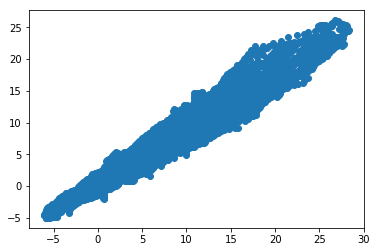

In [255]:
plt.plot(df.T6,df.T_out,"o")

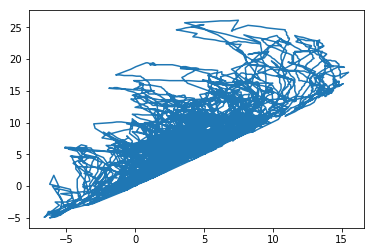

In [256]:
plt.plot(df.Tdewpoint,df.T_out)

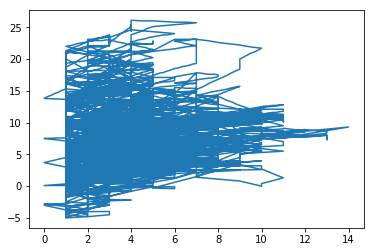

In [257]:
plt.plot(df.Windspeed,df.T_out)

In [ ]:
# Key Conclusion : Most important feature is T6 & Tdewpoint